In [1]:
import biodataplot.genomeview as gv
import biodataplot.utils as bpu
import matplotlib.pyplot as plt

In [2]:
import matplotlib
from pathlib import Path
font_dir = Path.cwd().parent / "font"
for font in ["Arial.ttf", "Arial_Bold.ttf"]:
    matplotlib.font_manager.fontManager.addfont(font_dir / font)
matplotlib.rcParams["font.family"] = "Arial"
bfontsize = 12
sfontsize = 9

In [3]:
PROJECT_DIR_d = "/fs/cbsuhy02/storage/yc2553/yc2553/projects/TRE_directionality/PROcap/"
PROJECT_DIR_r = "/fs/cbsuhy02/storage/yc2553/yc2553/projects/TRE_directionality/resources/"
PROJECT_DIR_o = "/fs/cbsuhy02/storage/yc2553/yc2553/projects/TRE_directionality/output/"

# Browser shot

In [4]:
def plot_example(title, region, outputfile):
	ks = ["pl", "mn"]
	data = {
			"PRO-cap (rep1)": [f"{PROJECT_DIR_d}Alignments/C1a_5{k}.bw" for k in ks],
			"PRO-cap (rep2)": [f"{PROJECT_DIR_d}Alignments/C1b_5{k}.bw" for k in ks],
			"DNase": f"{PROJECT_DIR_r}ENCODE/ENCFF414OGC.bigWig",
			"H3K27ac": f"{PROJECT_DIR_r}ENCODE/ENCFF849TDM.bigWig"
			}
	formatters = {
			"PRO-cap (rep1)": {"yscale":"asym_pos_neg", "plot_kw":{"width":3}},
			"PRO-cap (rep2)": {"yscale":"asym_pos_neg", "plot_kw":{"width":3}},
			"DNase": {"plot_kw": {"fill_kw":{"color":"#B3DE69"}}},
			"H3K27ac": {"plot_kw": {"fill_kw":{"color":"#FFD700"}}},
			}
	height_ratios = {
			"PRO-cap (rep1)": 8,
			"PRO-cap (rep2)": 8,
			"DNase": 5,
			"H3K27ac": 5
			}
	
	fig = gv.plot_genome_view(
		region,
		data = data,
		formatters = formatters,
		height_ratios = height_ratios,
		group_autoscales = [["PRO-cap (rep1)", "PRO-cap (rep2)"]],
		coordinate_kw = {"major_coordinate_unit":150}
		)
	
	bpu.plt_change_figure_properties(
		fig,
		**{"fig_prop": {"size_inches":[2.8, 1.9]},
		"fig_suptitle": title,
		"fig_suptitle_kwargs": {"fontsize":bfontsize, "fontweight":"bold"},
		"xticklabels_prop": {"fontsize":sfontsize},
		"yticklabels_prop": {"fontsize":sfontsize},
		"ylabel_prop": {"fontsize":bfontsize, "fontweight":"bold"},
		"xlabel_prop": {"fontsize":bfontsize, "fontweight":"bold"}
		},
		title_prop = {"text": ""}
		)

	bpu.plt_change_figure_properties(
		fig, 
		ax_targets=[-1],
		xlabel_prop={"text":f"Genomic position ({region.split(':')[0]})"}
		)

	for i in range(len(data)):
		fig.axes[i].yaxis.set_label_coords(-0.21, 0.5)
		fig.axes[i].yaxis.set_major_formatter(lambda s, pos: f"{s:.0f}")
		
	fig.savefig(outputfile, bbox_inches="tight", dpi=300)

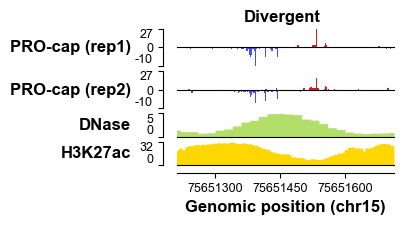

In [5]:
# Example divergent element

title = "Divergent"
region = "chr15:75651212-75651713"
outputfile = f"{PROJECT_DIR_o}figures/Fig1a.top.pdf"
plot_example(title, region, outputfile)

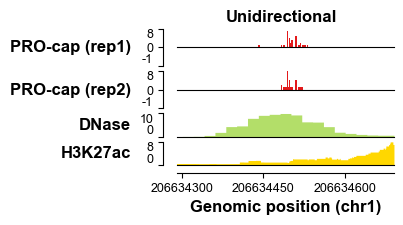

In [6]:
# Example unidirectional element

title = "Unidirectional"
# chr1:206634239-206634740
region = "chr1:206634290-206634690"
outputfile = f"{PROJECT_DIR_o}figures/Fig1a.bottom.pdf"
plot_example(title, region, outputfile)